# Converter-Test: test of the Converters Module

In [24]:
import os
import sys
from pathlib import Path
from statistics import mean

import matplotlib.pyplot as plt
import pandas as pd

RESULTS_PATH = Path('../choco/converters/validation/results')

sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'choco'))

In [25]:
def open_results(results_path: str) -> None:
    pass

### Process results folder

In [26]:
converters_group = {
    'wikifonia': 'leadsheet',
    'ireal-pro': 'leadsheet',
    'weimar': 'leadsheet',
    'nottingham': 'leadsheet',
    'when-in-rome': 'roman',
    'rock-corpus': 'roman',
    'jazz-corpus': 'leadsheet',
    'band-in-a-box': 'prettify-harte',
    'mozart-piano-sonatas': 'roman',
}

biased_paths = [p for p in RESULTS_PATH.rglob('s2-0[1-2]/**/*.xlsx')]
unbiased_paths = [p for p in RESULTS_PATH.rglob('s2-0[3-4]/**/*.xlsx')]

print(f'Found {len(biased_paths)} biased evaluation files:\n {[x.stem for x in biased_paths]}\n')
print(f'Found {len(unbiased_paths)} unbiased evaluation files:\n {[x.stem for x in unbiased_paths]}\n')

Found 10 biased evaluation files:
 ['wikifonia_1194', 'wikifonia_1047', 'rock-corpus_4', 'rock-corpus_16', 'ireal-pro_914', 'ireal-pro_542', 'weimar_8', 'weimar_263', 'when-in-rome_109', 'when-in-rome_406']

Found 10 unbiased evaluation files:
 ['wikifonia_3442', 'wikifonia_4327', 'rock-corpus_34', 'rock-corpus_183', 'ireal-pro_558', 'ireal-pro_1103', 'weimar_433', 'weimar_279', 'when-in-rome_205', 'when-in-rome_61']



In [27]:
all_validated = []

biased_validated = []

for biased_file in biased_paths:
    biased_data = pd.read_excel(biased_file, engine='openpyxl')
    validated_data = biased_data[biased_data['correct?'].notnull()]
    validated_data = validated_data.assign(partition=biased_file.stem.split('_')[0])
    validated_data = validated_data.assign(converter=converters_group[biased_file.stem.split('_')[0]])

    biased_validated.append(validated_data)

all_biased_validated = pd.concat(biased_validated)
all_biased_validated.drop(['type', 'time', 'duration'], axis=1, inplace=True)
all_validated.append(all_biased_validated)
all_biased_validated

,original,converted,correct?,notes,partition,converter,Unnamed: 7
1,B-7/E-,Bb:7/4,1.0,NaN,wikifonia,leadsheet,NaN
2,E-,Eb:maj,1.0,NaN,wikifonia,leadsheet,NaN
3,E-7,Eb:7,1.0,NaN,wikifonia,leadsheet,NaN
4,A-/E-,Ab:maj/5,1.0,"I don't understand this one, Ab major always h...",wikifonia,leadsheet,NaN
5,E-,Eb:maj,1.0,NaN,wikifonia,leadsheet,NaN
...,...,...,...,...,...,...,...
15,C major:I64,C:maj/5,1.0,C maj / 5,when-in-rome,roman,NaN
16,C major:V7,G:7,1.0,NaN,when-in-rome,roman,NaN
17,C major:I64,C:maj/5,1.0,C maj / 5,when-in-rome,roman,NaN
18,C major:V,G:maj,1.0,NaN,when-in-rome,roman,NaN


In [28]:
unbiased_validated = []

for unbiased_file in unbiased_paths:
    unbiased_data = pd.read_excel(unbiased_file, engine='openpyxl')
    unbiased_data = unbiased_data.assign(partition=unbiased_file.stem.split('_')[0])
    unbiased_data = unbiased_data.assign(converter=converters_group[unbiased_file.stem.split('_')[0]])

    unbiased_validated.append(unbiased_data)

all_unbiased_validated = pd.concat(unbiased_validated)
all_validated.append(all_unbiased_validated)
all_unbiased_validated

,original,converted,correct?,notes,partition,converter
0,D7,D:7,True,NaN,wikifonia,leadsheet
1,E-,Eb:maj,True,NaN,wikifonia,leadsheet
2,D7/F#,D:7/3,True,NaN,wikifonia,leadsheet
3,B-,Bb:maj,True,NaN,wikifonia,leadsheet
4,D7+,D:aug(b7),True,NaN,wikifonia,leadsheet
...,...,...,...,...,...,...
5,C major:iiø7,D:hdim7,True,NaN,when-in-rome,roman
6,C major:III+6/ii,F:aug/3,True,NaN,when-in-rome,roman
7,C major:I43,C:maj7/5,True,NaN,when-in-rome,roman
8,C major:IV64,F:maj/5,True,NaN,when-in-rome,roman


In [29]:
data = pd.concat(all_validated)

data

,original,converted,correct?,notes,partition,converter,Unnamed: 7
1,B-7/E-,Bb:7/4,1.0,NaN,wikifonia,leadsheet,NaN
2,E-,Eb:maj,1.0,NaN,wikifonia,leadsheet,NaN
3,E-7,Eb:7,1.0,NaN,wikifonia,leadsheet,NaN
4,A-/E-,Ab:maj/5,1.0,"I don't understand this one, Ab major always h...",wikifonia,leadsheet,NaN
5,E-,Eb:maj,1.0,NaN,wikifonia,leadsheet,NaN
...,...,...,...,...,...,...,...
5,C major:iiø7,D:hdim7,1.0,NaN,when-in-rome,roman,NaN
6,C major:III+6/ii,F:aug/3,1.0,NaN,when-in-rome,roman,NaN
7,C major:I43,C:maj7/5,1.0,NaN,when-in-rome,roman,NaN
8,C major:IV64,F:maj/5,1.0,NaN,when-in-rome,roman,NaN


## Compute data

In [30]:
for x in all_biased_validated.groupby(['converter']):
    print('biased ', x[0], ' has accuracy: ', x[1]['correct?'].mean().round(2))

for x in all_unbiased_validated.groupby(['converter']):
    print('unbiased ', x[0], ' has accuracy: ', x[1]['correct?'].mean().round(2))

data_accuracy = {}

for x in data.groupby(['converter']):
    data_accuracy[x[0]] = x[1]['correct?'].mean().round(3)
    print('all data ', x[0], ' has accuracy: ', x[1]['correct?'].mean().round(3))

data_accuracy['average'] = (data['correct?'].mean().round(3))
data_accuracy


biased  leadsheet  has accuracy:  1.0
biased  roman  has accuracy:  1.0
unbiased  leadsheet  has accuracy:  0.95
unbiased  roman  has accuracy:  1.0
all data  leadsheet  has accuracy:  0.974
all data  roman  has accuracy:  1.0


{'leadsheet': 0.974, 'roman': 1.0, 'average': 0.985}

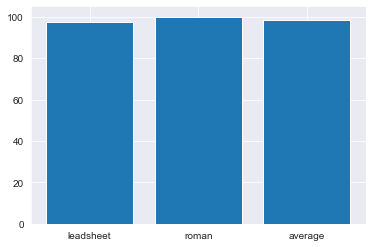

In [31]:
plt.bar(range(len(data_accuracy)), list([x * 100 for x in data_accuracy.values()]), align='center')
plt.xticks(range(len(data_accuracy)), list(data_accuracy.keys()))

plt.show()

In [32]:
data_accuracy_partitions = {}

for x in data.groupby(['partition']):
    data_accuracy_partitions[x[0]] = [len(x[1]['correct?']),
                                      ''.join([e for e in set(x[1]['converter'])]),
                                      x[1]['correct?'].tolist().count(1),
                                      x[1]['correct?'].tolist().count(0),
                                      x[1]['correct?'].mean().round(3)]
    print('all data ', x[0], ' has accuracy: ', x[1]['correct?'].mean().round(3))

# calculate average
data_accuracy_partitions['average'] = [len(data['correct?']),
                                       'all',
                                       data['correct?'].tolist().count(1),
                                       data['correct?'].tolist().count(0),
                                       data['correct?'].mean().round(3)]

data_accuracy_partitions

all data  ireal-pro  has accuracy:  0.949
all data  rock-corpus  has accuracy:  1.0
all data  weimar  has accuracy:  1.0
all data  when-in-rome  has accuracy:  1.0
all data  wikifonia  has accuracy:  0.975


{'ireal-pro': [39, 'leadsheet', 37, 2, 0.949],
 'rock-corpus': [40, 'roman', 40, 0, 1.0],
 'weimar': [37, 'leadsheet', 37, 0, 1.0],
 'when-in-rome': [40, 'roman', 40, 0, 1.0],
 'wikifonia': [40, 'leadsheet', 39, 1, 0.975],
 'average': [196, 'all', 193, 3, 0.985]}

In [43]:
computed_accuracy = pd.DataFrame.from_dict(data_accuracy_partitions, orient ='index', columns=['Validated chords', 'Chords type', 'Correct chords', 'Wrong chords', 'Accuracy'])

print(computed_accuracy.to_latex())

\begin{tabular}{lrlrrr}
\toprule
{} &  Validated chords & Chords type &  Correct chords &  Wrong chords &  Accuracy \\
\midrule
ireal-pro    &                39 &   leadsheet &              37 &             2 &     0.949 \\
rock-corpus  &                40 &       roman &              40 &             0 &     1.000 \\
weimar       &                37 &   leadsheet &              37 &             0 &     1.000 \\
when-in-rome &                40 &       roman &              40 &             0 &     1.000 \\
wikifonia    &                40 &   leadsheet &              39 &             1 &     0.975 \\
average      &               196 &         all &             193 &             3 &     0.985 \\
\bottomrule
\end{tabular}



/var/folders/y6/881nbsns7rx5scbj8lx6ysym0000gn/T/ipykernel_70294/1581596972.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(computed_accuracy.to_latex())


TypeError: can't convert type 'list' to numerator/denominator

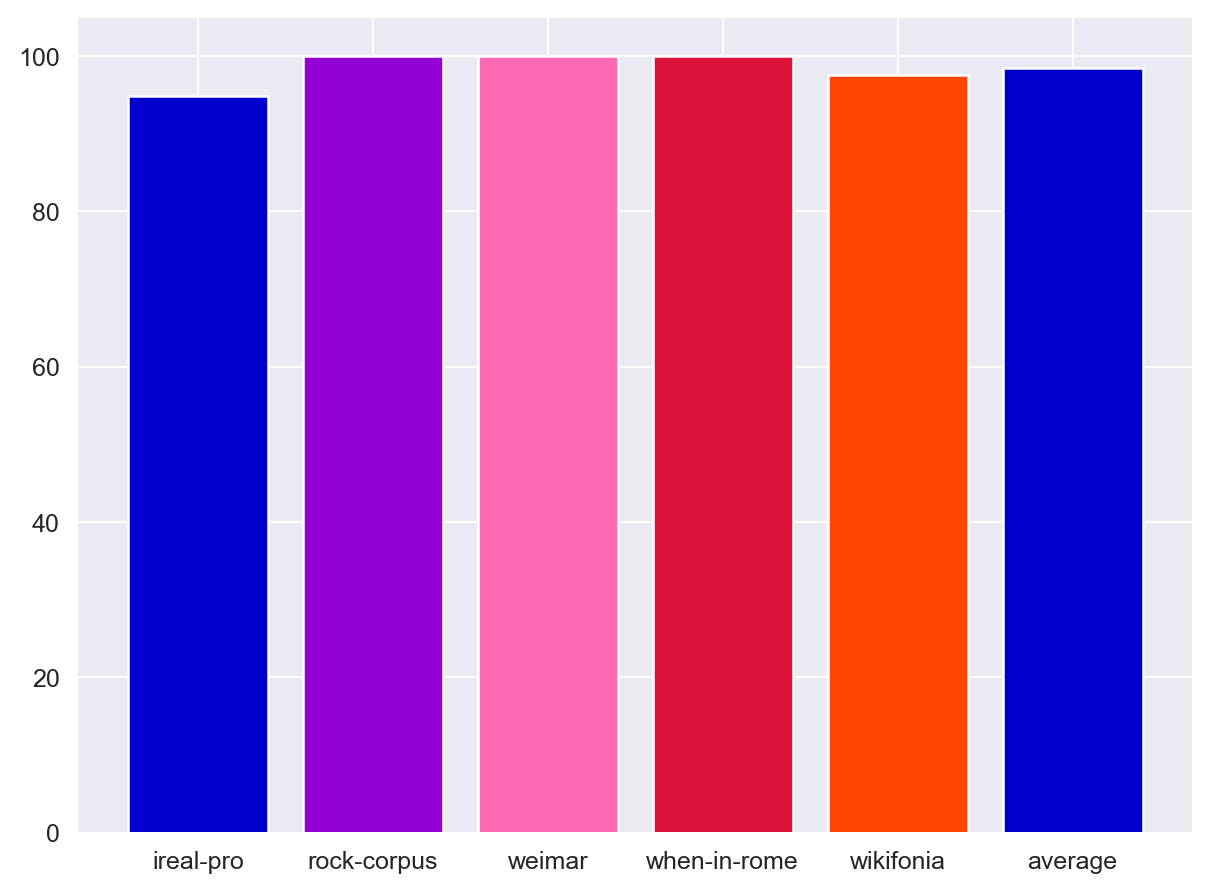

In [37]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=180)

plt.bar(range(len(data_accuracy_partitions)), list([x[-1] * 100 for x in data_accuracy_partitions.values()]),
        align='center', color=['mediumblue', 'darkviolet', 'hotpink', 'crimson', 'orangered'])
plt.xticks(range(len(data_accuracy_partitions)), list(data_accuracy_partitions.keys()))
plt.yscale('linear')
average = plt.axhline(y=mean(data_accuracy_partitions.values()) * 100, color='red', label='average')
first_legend = plt.legend(handles=[average], loc=4)

plt.show()